In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
path = ''#input path to folder in which you want to save the plots
DT = dtype = {'cbow0_sample': np.float64, 'cbow1_sample': np.float64, 'SklearnLogReg' : str, 'SklearnLinearSVC' : str}
#list all csv files you want to process
concat_IMDB = pd.read_csv("Results_concat_IMDB.csv", dtype = DT)
concat_IMDB_reg = pd.read_csv('Results_concat_IMDB_regularization_24cores.csv', dtype = DT)
concat_20ng = pd.concat([pd.read_csv('Results_concat_20ng_normalized(64 cores).csv', dtype = DT),pd.read_csv('Results_concat_20ng_24cores_end(normalized).csv', dtype = DT)])
concat_20ng_reg = pd.read_csv('Results_concat_20ng_24cores_reg.csv', dtype = DT)
#list dataframes names here
files = [concat_IMDB, concat_IMDB_reg, concat_20ng, concat_20ng_reg]
#and future folders' names where you want to save results respectively
names = ['concat_IMDB/', 'concat_IMDB_reg/', 'concat_20ng/', 'concat_20ng_reg/']
for name in names:
    os.mkdir(path + name)
    for measure in ['precision', 'recall', 'f_score', 'train_accuracy', 'test_accuracy', 'cv']:
        os.mkdir(path + name + '/' + measure)
#names of used classifier columns in csv files
classifiers = ['SklearnLinearSVC', 'SklearnLogReg']

In [2]:
default_params = dict()
default_params['size'] = 150
default_params['window'] = 10
default_params['negative'] = 25
default_params['alpha'] = 0.05
default_params['cbow0_sample'] = 1e-2
default_params['cbow1_sample'] = 1e-4
other_model = dict()
other_model['cbow0_sample'] = 'cbow1_sample'
other_model['cbow1_sample'] = 'cbow0_sample'
PV = dict()
PV['cbow0_sample'] = 'PV-DBOW'
PV['cbow1_sample'] = 'PV-DM'


In [36]:
def plot_pars(classifiers, min_, DFrame, value, file_name):
    %matplotlib inline
    sns.set(style="ticks")
    for par in ['size', 'alpha', 'window', 'negative']:
        # Create a dataset with many short random walks
        df = DFrame[DFrame[par] != default_params[par]]
        df = pd.concat([df, default_df])
        dd = df.reset_index(drop=True)
        for classifier in classifiers:
            accuracy = []
            for h in df[classifier]:
                i = h.find(value)
                accuracy += [h[i:].split()[3]]
            acc_df = pd.DataFrame(accuracy, columns = [classifier], dtype=np.float64)
            dd[classifier]=acc_df[classifier]
        # Initialize a grid of plots with an Axes for each walk
        grid = sns.FacetGrid(dd.sort_values(by=par), aspect = 1)

        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, c=".5")

        # Draw a line plot to show the trajectory of each random walk
        grid.map(plt.plot, par, classifiers[0], marker="o", ms=8, color='r').set_axis_labels(par, value)
        grid.map(plt.plot, par, classifiers[1], marker="o", ms=8).set_axis_labels(par, value)
        # Adjust the tick positions and labels
        grid.set(ylim=(min_, 1), xticks=dd[par], xlim = (min(dd[par]), max(dd[par]) + min(dd[par])/10))
        grid.fig.tight_layout(w_pad=1)
        # Adjust the arrangement of the plots
        
        plt.savefig(file_name+'/' + par)

In [35]:
def plot_models(classifiers, min_,  DFrame, value, model):
    %matplotlib inline
    sns.set(style="ticks")
    other = other_model[model]
    # Create a dataset with many short random walks
    df = DFrame[DFrame[model] == default_params[model]]
    df = df[df[other] != default_params[other]]
    df = pd.concat([df, default_df])
    dd = pd.DataFrame(df[other])
    dd = dd.reset_index(drop=True)
    for classifier in classifiers:
        accuracy = []
        for h in df[classifier]:
            i = h.find(value)
            accuracy += [h[i:].split()[3]]
        acc_df = pd.DataFrame(accuracy, columns = [classifier], dtype=np.float64)
        dd[classifier]=acc_df[classifier]
        
    # Initialize a grid of plots with an Axes for each walk
    grid = sns.FacetGrid(dd.sort_values(by=other), aspect = 1)

    # Draw a horizontal line to show the starting point
    grid.map(plt.axhline, c=".5")
    
    # Draw a line plot to show the trajectory of each random walk
    grid.map(plt.plot, other, classifiers[0], marker="o", ms=8, color='r').set_axis_labels(PV[model], value)
    grid.map(plt.plot, other, classifiers[1], marker="o", ms=8).set_axis_labels(PV[model], value)
    #grid.add_legend(legend_data=dict(onepeak=a, twopeaks=a), label_order=['onepeak', 'twopeaks'], title='model')
    
    # Adjust the tick positions and labels
    grid.set(ylim=(min_, 1), xticks=dd[other], xlim = (min(dd[other]), max(dd[other]) + min(dd[other])))
    grid.fig.tight_layout(w_pad=1)
    # Adjust the arrangement of the plots
    return grid.fig

In [10]:
def plot_pars_accuracy(classifiers, min_, DFrame, value, file_name):
    %matplotlib inline
    sns.set(style="ticks")
    for par in ['size', 'alpha', 'window', 'negative']:
        # Create a dataset with many short random walks
        df = DFrame[DFrame[par] != default_params[par]]
        df = pd.concat([df, default_df])
        dd = df.reset_index(drop=True)
        for classifier in classifiers:
            accuracy = []
            for h in df[classifier]:
                i = h.find(value)
                accuracy += [h[i:].split()[1]]
            acc_df = pd.DataFrame(accuracy, columns = [classifier], dtype=np.float64)
            dd[classifier]=acc_df[classifier]
        # Initialize a grid of plots with an Axes for each walk
        grid = sns.FacetGrid(dd.sort_values(by=par), aspect = 3)

        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, c=".5")

        # Draw a line plot to show the trajectory of each random walk
        grid.map(plt.plot, par, classifiers[0], marker="o", ms=8, color='r').set_axis_labels(par, value)
        grid.map(plt.plot, par, classifiers[1], marker="o", ms=8).set_axis_labels(par, value)
        # Adjust the tick positions and labels
        grid.set(ylim=(min_, 1), xticks=dd[par], xlim = (min(dd[par]), max(dd[par]) + min(dd[par])/10))

        # Adjust the arrangement of the plots
        grid.fig.tight_layout()
        plt.savefig(file_name+'/' + par)

In [18]:
def plot_models_accuracy(classifiers, min_,  DFrame, value, model):
    %matplotlib inline
    sns.set(style="ticks")
    other = other_model[model]
    # Create a dataset with many short random walks
    df = DFrame[DFrame[model] == default_params[model]]
    df = df[df[other] != default_params[other]]
    df = pd.concat([df, default_df])
    dd = pd.DataFrame(df[other])
    dd = dd.reset_index(drop=True)
    for classifier in classifiers:
        accuracy = []
        for h in df[classifier]:
            i = h.find(value)
            accuracy += [h[i:].split()[1]]
        acc_df = pd.DataFrame(accuracy, columns = [classifier], dtype=np.float64)
        dd[classifier]=acc_df[classifier]
        
    # Initialize a grid of plots with an Axes for each walk
    grid = sns.FacetGrid(dd.sort_values(by=other), aspect = 3)

    # Draw a horizontal line to show the starting point
    grid.map(plt.axhline, c=".5")
    
    # Draw a line plot to show the trajectory of each random walk
    grid.map(plt.plot, other, classifiers[0], marker="o", ms=8, color='r').set_axis_labels(PV[model], value)
    grid.map(plt.plot, other, classifiers[1], marker="o", ms=8).set_axis_labels(PV[model], value)
    #grid.add_legend(legend_data=dict(onepeak=a, twopeaks=a), label_order=['onepeak', 'twopeaks'], title='model')
    
    # Adjust the tick positions and labels
    grid.set(ylim=(min_, 1), xticks=dd[other], xlim = (min(dd[other]), max(dd[other]) + min(dd[other])))

    # Adjust the arrangement of the plots
    return grid.fig

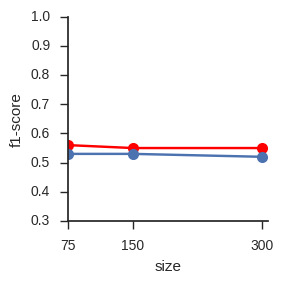

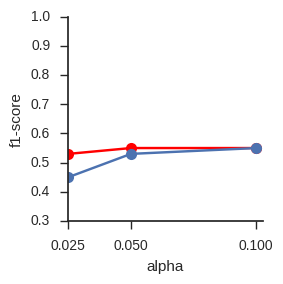

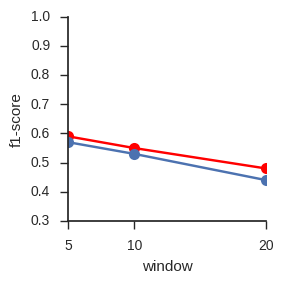

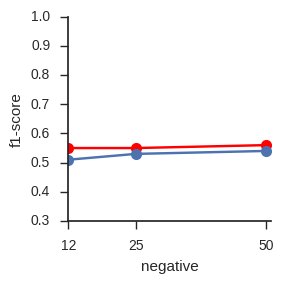

In [37]:
for data, file_name in zip(files, names):
    default_df = data
    
    for par in default_params:
        default_df = default_df[default_df[par] == default_params[par]]
    for measure in ['precision', 'recall', 'f1-score']:
        f_p = path + file_name+measure.replace('-','_').replace('1','')
        fig = plot_models(classifiers, 0.3, data, measure, 'cbow1_sample')
        plt.savefig(f_p+'/PV_DM')
        fig = plot_models(classifiers, 0.3, data, measure, 'cbow0_sample')
        plt.savefig(f_p+'/PV_DBOW')
        plot_pars(classifiers, 0.3, data, measure, f_p)
        

In [ ]:
for data, file_name in zip(files, names):
    default_df = data
    for par in default_params:
        default_df = default_df[default_df[par] == default_params[par]]
    for measure in ['train', 'test', 'cv']:
        value = measure
        if (value == 'test' or value == 'train'):
            value = value + '_accuracy'
        f_p = path + file_name+value
        fig = plot_models_accuracy(classifiers, 0.3, data, measure, 'cbow1_sample')
        plt.savefig(f_p+'/PV_DM')
        fig = plot_models_accuracy(classifiers, 0.3, data, measure, 'cbow0_sample')
        plt.savefig(f_p+'/PV_DBOW')
        plot_pars_accuracy(classifiers, 0.3, data, measure, f_p)
        